# Get data for train and test

In [2]:
from google.colab import drive
drive.mount("/content/MyDrive")

Mounted at /content/MyDrive


In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from tensorflow.keras.preprocessing import image_dataset_from_directory

## Small dataset

In [4]:
%cp "/content/MyDrive/MyDrive/KHDL/SmallDS.zip" "/content"
!unzip "/content/SmallDS.zip" -d "/content/my_datasets"

Archive:  /content/SmallDS.zip
  inflating: /content/my_datasets/SmallDS/test/male_face_image/971.jpg  
  inflating: /content/my_datasets/SmallDS/test/male_face_image/956.jpg  
  inflating: /content/my_datasets/SmallDS/test/male_face_image/913.jpg  
  inflating: /content/my_datasets/SmallDS/test/male_face_image/907.jpg  
  inflating: /content/my_datasets/SmallDS/test/male_face_image/968.jpg  
  inflating: /content/my_datasets/SmallDS/test/male_face_image/960.jpg  
  inflating: /content/my_datasets/SmallDS/test/male_face_image/919.jpg  
  inflating: /content/my_datasets/SmallDS/test/male_face_image/931.jpg  
  inflating: /content/my_datasets/SmallDS/test/male_face_image/943.jpg  
  inflating: /content/my_datasets/SmallDS/test/male_face_image/966.jpg  
  inflating: /content/my_datasets/SmallDS/test/male_face_image/979.jpg  
  inflating: /content/my_datasets/SmallDS/test/male_face_image/985.jpg  
  inflating: /content/my_datasets/SmallDS/test/male_face_image/990.jpg  
  inflating: /conten

In [5]:
train_data_folder = "/content/my_datasets/SmallDS/train"
val_data_folder = "/content/my_datasets/SmallDS/val"
test_data_folder = "/content/my_datasets/SmallDS/test"

# training data
train_dataset = image_dataset_from_directory(train_data_folder,
                                             shuffle=True,
                                             batch_size=64,
                                             image_size=(120, 80))

# validation data
validation_dataset = image_dataset_from_directory(val_data_folder,
                                                  shuffle=True,
                                                  batch_size=64,
                                                  image_size=(120, 80))
# test data
test_dataset = image_dataset_from_directory(test_data_folder,
                                            shuffle=True,
                                            batch_size=64,
                                            image_size=(120, 80))
print(train_dataset.class_names)
print(validation_dataset.class_names)
print(test_dataset.class_names)

Found 800 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
['female_face_image', 'male_face_image']
['female_face_image', 'male_face_image']
['female_face_image', 'male_face_image']


## Big dataset

In [ ]:
%cp "/content/MyDrive/MyDrive/KHDL/datasets.zip" "/content"
!unzip "/content/datasets.zip" -d "/content/my_datasets"

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: /content/my_datasets/datasets/train/female_face_image/950.jpg  
  inflating: /content/my_datasets/datasets/train/female_face_image/951.jpg  
  inflating: /content/my_datasets/datasets/train/female_face_image/953.jpg  
  inflating: /content/my_datasets/datasets/train/female_face_image/954.jpg  
  inflating: /content/my_datasets/datasets/train/female_face_image/955.jpg  
  inflating: /content/my_datasets/datasets/train/female_face_image/957.jpg  
  inflating: /content/my_datasets/datasets/train/female_face_image/958.jpg  
  inflating: /content/my_datasets/datasets/train/female_face_image/96.jpg  
  inflating: /content/my_datasets/datasets/train/female_face_image/960.jpg  
  inflating: /content/my_datasets/datasets/train/female_face_image/961.jpg  
  inflating: /content/my_datasets/datasets/train/female_face_image/962.jpg  
  inflating: /content/my_datasets/datasets/train/female_face_image/963.jpg  
  inflating: /conten

In [ ]:
train_data_folder = "/content/my_datasets/datasets/train"
val_data_folder = "/content/my_datasets/datasets/val"
test_data_folder = "/content/my_datasets/datasets/test"

# training data
train_dataset = image_dataset_from_directory(train_data_folder,
                                             shuffle=True,
                                             batch_size=64,
                                             image_size=(120, 80))

# validation data
validation_dataset = image_dataset_from_directory(val_data_folder,
                                                  shuffle=True,
                                                  batch_size=64,
                                                  image_size=(120, 80))
# test data
test_dataset = image_dataset_from_directory(test_data_folder,
                                            shuffle=True,
                                            batch_size=64,
                                            image_size=(120, 80))
print(train_dataset.class_names)
print(validation_dataset.class_names)
print(test_dataset.class_names)

Found 8364 files belonging to 2 classes.
Found 1045 files belonging to 2 classes.
Found 1047 files belonging to 2 classes.
['female_face_image', 'male_face_image']
['female_face_image', 'male_face_image']
['female_face_image', 'male_face_image']


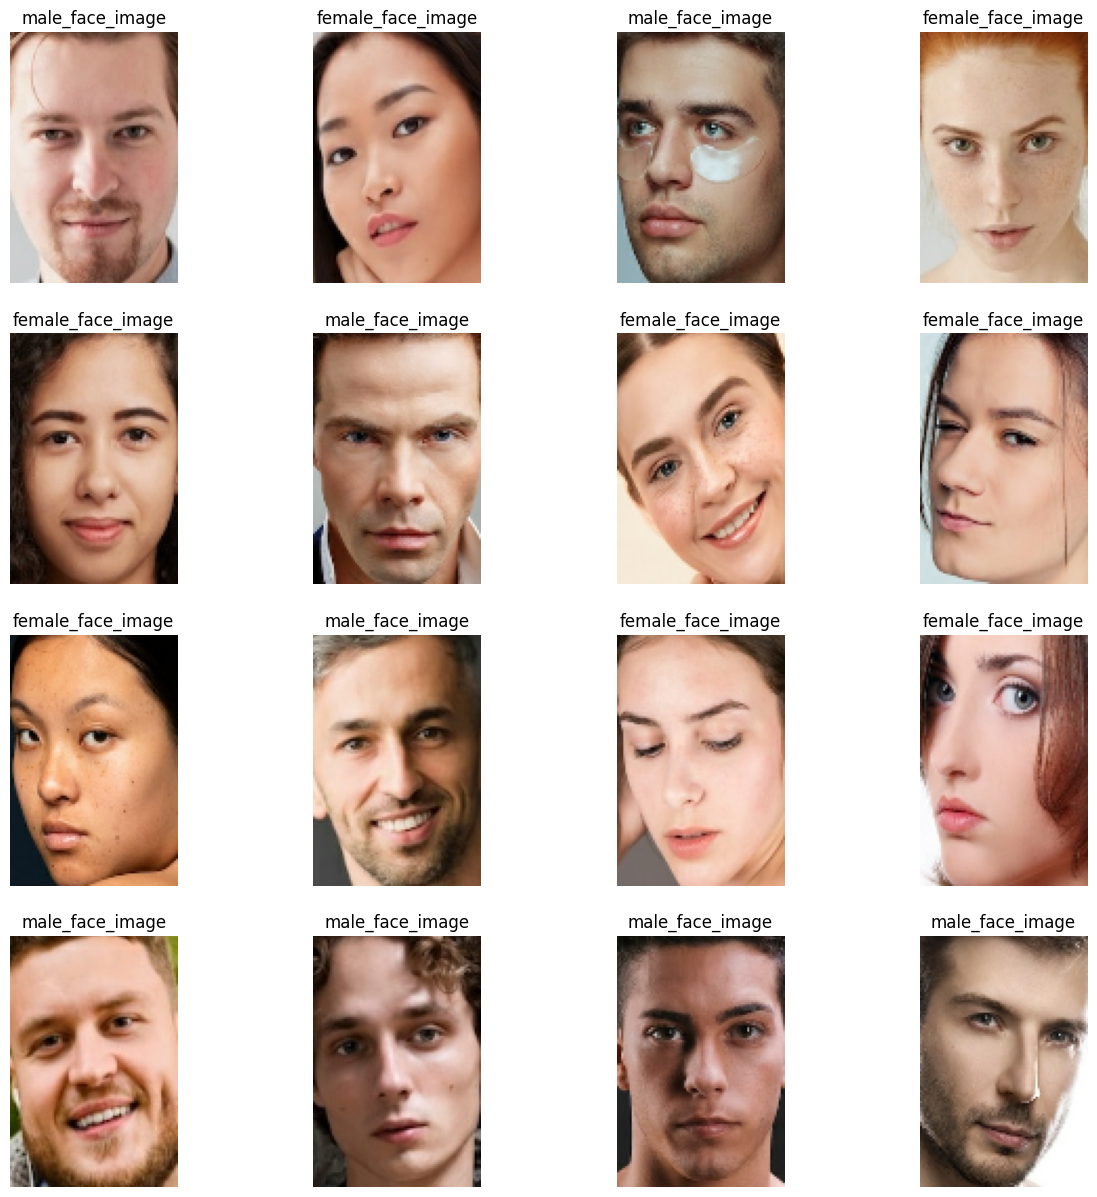

In [ ]:
class_names = train_dataset.class_names

plt.figure(figsize=(15, 15))
for images, labels in train_dataset.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# HOG & SVM

## Visulize HOG (Histograms of Oriented Gradients)

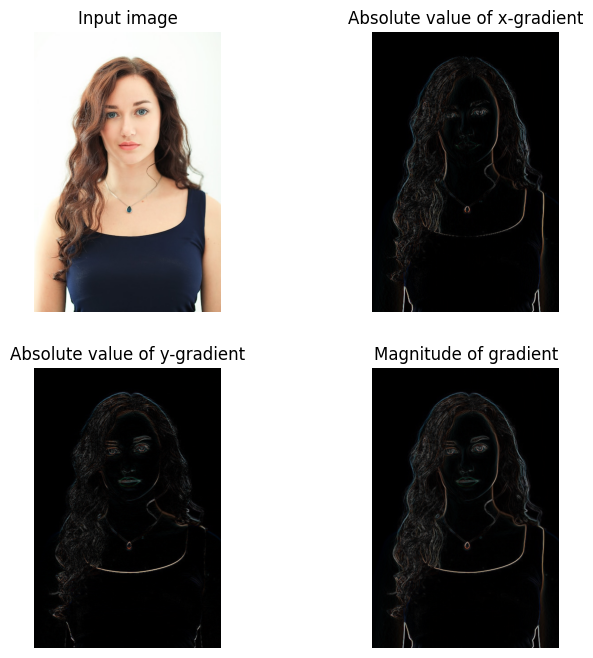

In [ ]:
import matplotlib.pyplot as plt

img_path = '/content/41.jpg'
img = cv2.imread(img_path)
img = np.float32(img) / 255.0
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

xkernel = np.array([[-1, 0, 1]])
ykernel = np.array([[-1], [0], [1]])
dx = cv2.filter2D(img, cv2.CV_32F, xkernel)
dy = cv2.filter2D(img, cv2.CV_32F, ykernel)
mag = np.sqrt(dx ** 2 + dy ** 2)
# dx = np.abs(dx) / np.max(np.abs(dx))
# dy = np.abs(dy) / np.max(np.abs(dy))
# mag = np.abs(mag) / np.max(np.abs(mag))
dx = abs(dx)
dy = abs(dy)
dx = (dx - np.min(dx)) / (np.max(dx) - np.min(dx))
dy = (dy - np.min(dy)) / (np.max(dy) - np.min(dy))
mag = (mag - np.min(mag)) / (np.max(mag) - np.min(mag))
# print(np.min(dx), np.max(dx))
# print(np.min(dy), np.max(dy))
# print(np.min(mag), np.max(mag))

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(img, cmap=plt.cm.gray)
ax1.set_title('Input image')

ax2.axis('off')
ax2.imshow(dx, cmap=plt.cm.gray)
ax2.set_title('Absolute value of x-gradient')

ax3.axis('off')
ax3.imshow(dy, cmap=plt.cm.gray)
ax3.set_title('Absolute value of y-gradient')

ax4.axis('off')
ax4.imshow(mag, cmap=plt.cm.gray)
ax4.set_title('Magnitude of gradient')
plt.show()

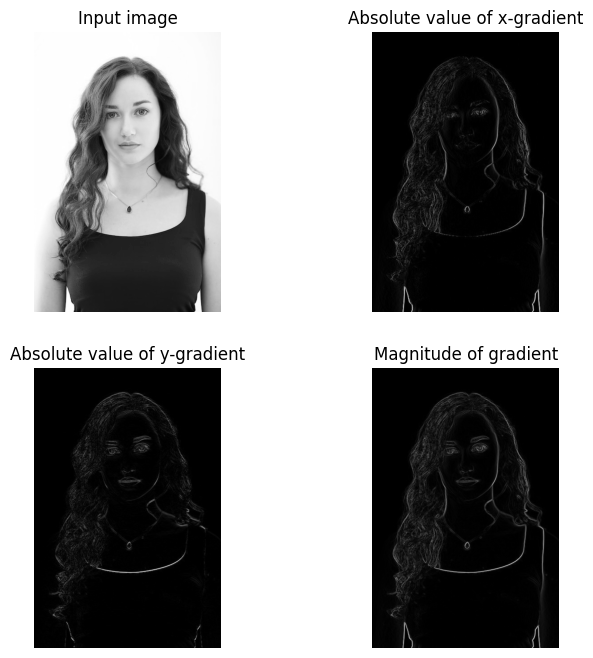

In [ ]:
import matplotlib.pyplot as plt

img_path = '/content/41.jpg'
img = cv2.imread(img_path)
img = np.float32(img) / 255.0
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

xkernel = np.array([[-1, 0, 1]])
ykernel = np.array([[-1], [0], [1]])
dx = cv2.filter2D(img, cv2.CV_32F, xkernel)
dy = cv2.filter2D(img, cv2.CV_32F, ykernel)
mag = np.sqrt(dx ** 2 + dy ** 2)
dx = abs(dx)
dy = abs(dy)
dx = (dx - np.min(dx)) / (np.max(dx) - np.min(dx))
dy = (dy - np.min(dy)) / (np.max(dy) - np.min(dy))
mag = (mag - np.min(mag)) / (np.max(mag) - np.min(mag))

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(img, cmap=plt.cm.gray)
ax1.set_title('Input image')

ax2.axis('off')
ax2.imshow(dx, cmap=plt.cm.gray)
ax2.set_title('Absolute value of x-gradient')

ax3.axis('off')
ax3.imshow(dy, cmap=plt.cm.gray)
ax3.set_title('Absolute value of y-gradient')

ax4.axis('off')
ax4.imshow(mag, cmap=plt.cm.gray)
ax4.set_title('Magnitude of gradient')
plt.show()

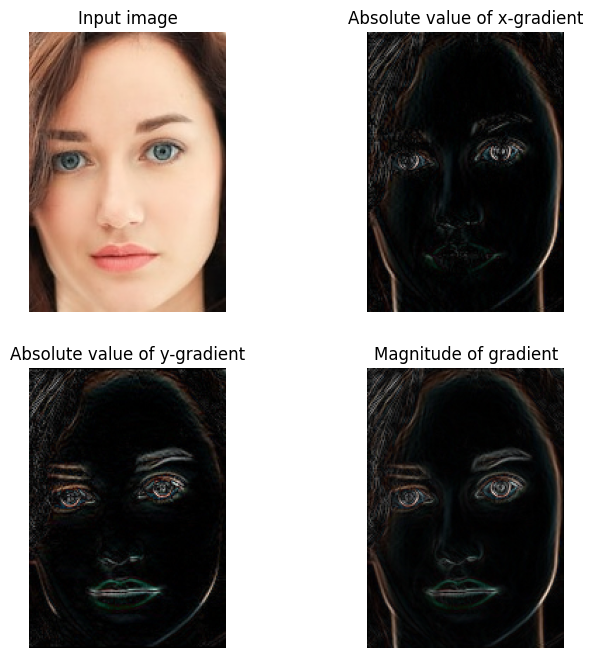

In [ ]:
import matplotlib.pyplot as plt

img_path = '/content/41_crop.jpg'
img = cv2.imread(img_path)
img = np.float32(img) / 255.0
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

xkernel = np.array([[-1, 0, 1]])
ykernel = np.array([[-1], [0], [1]])
dx = cv2.filter2D(img, cv2.CV_32F, xkernel)
dy = cv2.filter2D(img, cv2.CV_32F, ykernel)
mag = np.sqrt(dx ** 2 + dy ** 2)
dx = abs(dx)
dy = abs(dy)
dx = (dx - np.min(dx)) / (np.max(dx) - np.min(dx))
dy = (dy - np.min(dy)) / (np.max(dy) - np.min(dy))
mag = (mag - np.min(mag)) / (np.max(mag) - np.min(mag))

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(img, cmap=plt.cm.gray)
ax1.set_title('Input image')

ax2.axis('off')
ax2.imshow(dx, cmap=plt.cm.gray)
ax2.set_title('Absolute value of x-gradient')

ax3.axis('off')
ax3.imshow(dy, cmap=plt.cm.gray)
ax3.set_title('Absolute value of y-gradient')

ax4.axis('off')
ax4.imshow(mag, cmap=plt.cm.gray)
ax4.set_title('Magnitude of gradient')
plt.show()

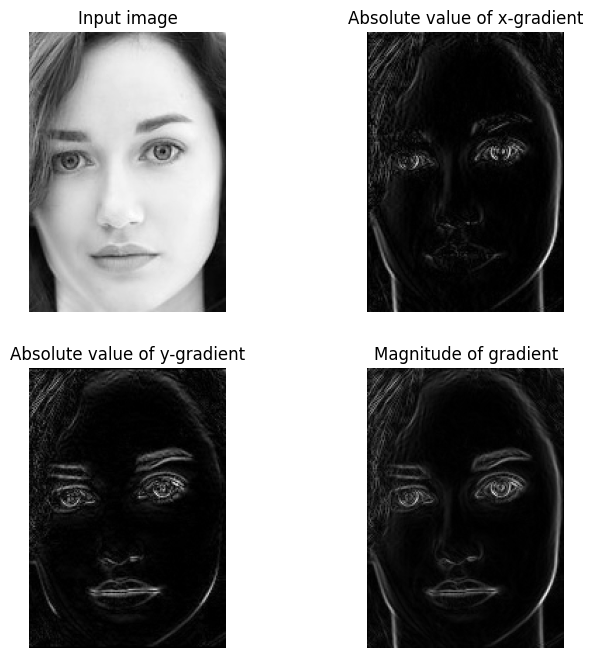

In [ ]:
import matplotlib.pyplot as plt

img_path = '/content/41_crop.jpg'
img = cv2.imread(img_path)
img = np.float32(img) / 255.0
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

xkernel = np.array([[-1, 0, 1]])
ykernel = np.array([[-1], [0], [1]])
dx = cv2.filter2D(img, cv2.CV_32F, xkernel)
dy = cv2.filter2D(img, cv2.CV_32F, ykernel)
mag = np.sqrt(dx ** 2 + dy ** 2)
dx = abs(dx)
dy = abs(dy)
dx = (dx - np.min(dx)) / (np.max(dx) - np.min(dx))
dy = (dy - np.min(dy)) / (np.max(dy) - np.min(dy))
mag = (mag - np.min(mag)) / (np.max(mag) - np.min(mag))

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(img, cmap=plt.cm.gray)
ax1.set_title('Input image')

ax2.axis('off')
ax2.imshow(dx, cmap=plt.cm.gray)
ax2.set_title('Absolute value of x-gradient')

ax3.axis('off')
ax3.imshow(dy, cmap=plt.cm.gray)
ax3.set_title('Absolute value of y-gradient')

ax4.axis('off')
ax4.imshow(mag, cmap=plt.cm.gray)
ax4.set_title('Magnitude of gradient')
plt.show()

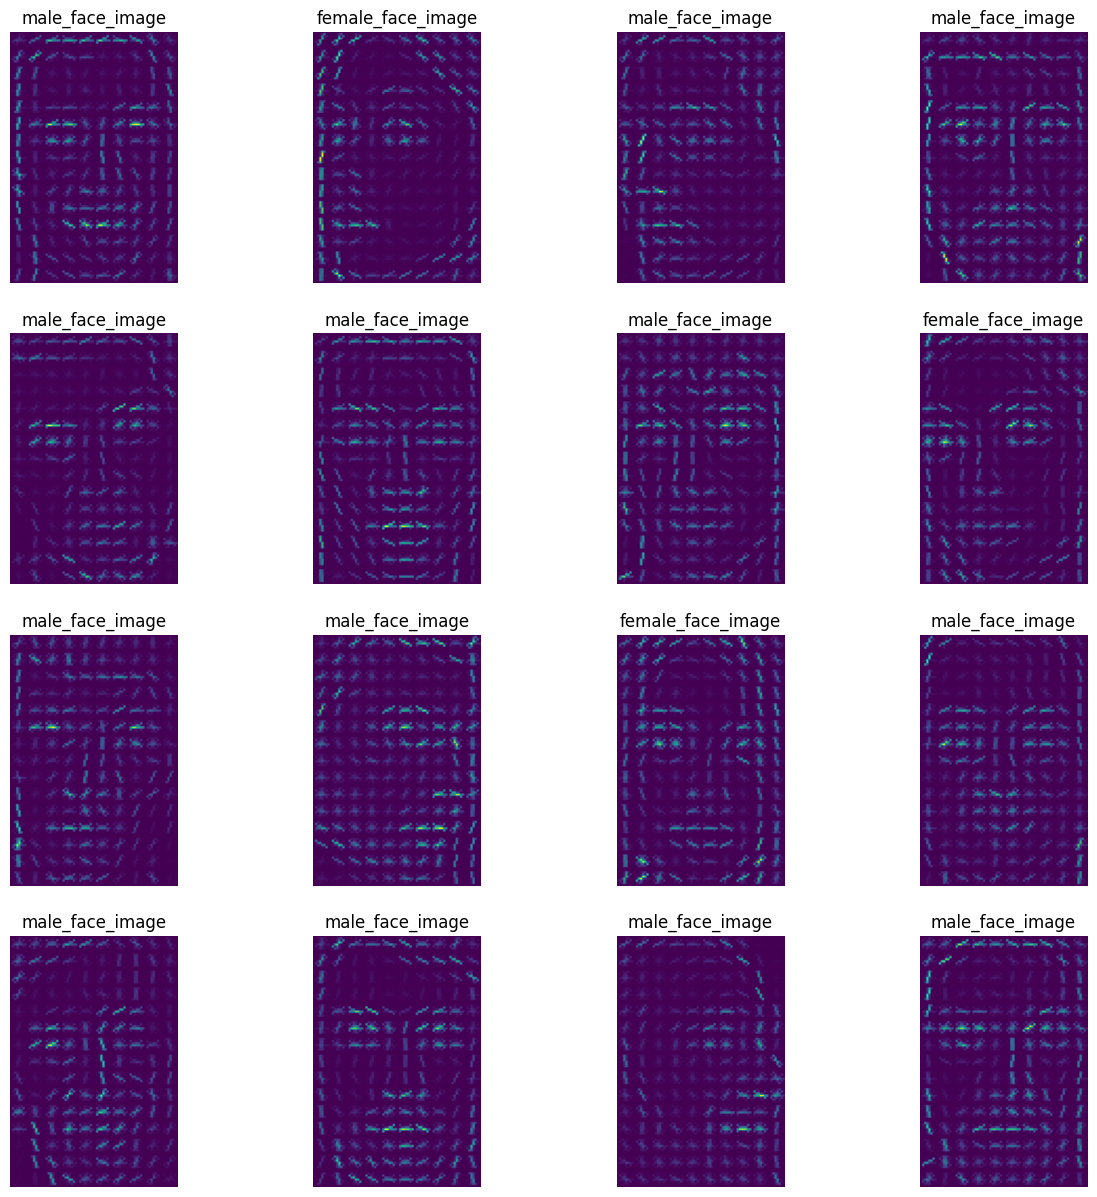

In [ ]:
from skimage.feature import hog
class_names = train_dataset.class_names

plt.figure(figsize=(15, 15))
for images, labels in train_dataset.take(1):
    # images (64,120,80,3)
    for i in range(16):
        ax = plt.subplot(4, 4, i+1)
        hog_feature, hog_img = hog(images[i].numpy().astype("uint8"), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2', visualize=True, channel_axis=2)
        plt.imshow(hog_img)
        plt.title(class_names[labels[i]])
        plt.axis("off")

* Input shape: (120, 80) (gray scale)
  * pixels_per_cell = (8, 8), orientations = 9 => (num_cell_y, num_cell_x, orientations) = (15, 10, 9)
  * block_size = (2, 2) => (num_block_y, num_block_x, block_size[0] * block_size[1] * orientations) = (14, 9, 36)
* Output shape: 14x9x36 = 4536

## Small dataset

### Feature extraction

In [ ]:
def compute_gradient(image):
    # Compute gradient using Sobel kernel
    # dx = cv2.Sobel(image, cv2.CV_32F, 1, 0, ksize=1)
    # dy = cv2.Sobel(image, cv2.CV_32F, 0, 1, ksize=1)
    xkernel = np.array([[-1, 0, 1]])
    ykernel = np.array([[-1], [0], [1]])
    dx = cv2.filter2D(img, cv2.CV_32F, xkernel)
    dy = cv2.filter2D(img, cv2.CV_32F, ykernel)
    
    # Compute magnitude and direction of gradient
    mag = np.sqrt(dx ** 2 + dy ** 2)
    angle = np.arctan(dy/(dx+1e-5))
    return mag, angle

def hog_normalize_block(block, method, eps=1e-5):
    if method == 'L1':
        out = block / (np.sum(np.abs(block)) + eps)
    elif method == 'L1-sqrt':
        out = np.sqrt(block / (np.sum(np.abs(block)) + eps))
    elif method == 'L2':
        out = block / np.sqrt(np.sum(block ** 2) + eps ** 2)
    elif method == 'L2-Hys':
        out = block / np.sqrt(np.sum(block ** 2) + eps ** 2)
        out = np.minimum(out, 0.2)
        out = out / np.sqrt(np.sum(out ** 2) + eps ** 2)
    else:
        raise ValueError('Selected block normalization method is invalid.')

    return out

In [ ]:
def compute_hog(image, pixels_per_cell=(8, 8), block_size=(2, 2), orientations=9, block_norm='L2-Hys'):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = np.float32(image) / 255.0
    # Compute gradient and direction
    magnitude, angle = compute_gradient(image)
    angle = np.degrees(angle) # -90 -> 9
    angle += 90 # 0 -> 180
    # print(np.min(angle), np.max(angle))

    # Compute the number of cells in each dimension
    n_cells_x = int(image.shape[1] // pixels_per_cell[1])
    n_cells_y = int(image.shape[0] // pixels_per_cell[0])
    
    # Compute histogram for each cell
    histograms = np.zeros((n_cells_y, n_cells_x, orientations), dtype=np.float32)
    for i in range(n_cells_y):
        for j in range(n_cells_x):
            cell_mag = magnitude[i * pixels_per_cell[0]:(i + 1) * pixels_per_cell[0],
                            j * pixels_per_cell[1]:(j + 1) * pixels_per_cell[1]]
            cell_orientation = angle[i * pixels_per_cell[0]:(i + 1) * pixels_per_cell[0],
                                j * pixels_per_cell[1]:(j + 1) * pixels_per_cell[1]]
            # https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html
            histograms[i, j], _  = np.histogram(cell_orientation, bins=orientations, range=(0, 180), weights=cell_mag) # 1-D vector, 9 elements
    # print('(num_cell_y, num_cell_x, orientations)')
    # print(histograms.shape)

    # Compute the number of blocks in each dimension
    n_blocks_x = n_cells_x - block_size[1] + 1
    n_blocks_y = n_cells_y - block_size[0] + 1
    
    # Compute normalized block descriptor for each block
    hog_features = np.zeros((n_blocks_y, n_blocks_x, block_size[0] * block_size[1] * orientations), dtype=np.float32)
    for i in range(n_blocks_y):
        for j in range(n_blocks_x):
            block_hist = histograms[i:i + block_size[0], j:j + block_size[1], :].flatten()
            block_hist = hog_normalize_block(block_hist, block_norm)
            hog_features[i, j] = block_hist
    # print('(num_block_y, num_block_x, block_size[0] * block_size[1] * orientations)')
    # print(hog_features.shape)

    # Flatten the feature array to obtain the final HOG feature vector
    hog_features = hog_features.flatten()
    
    return hog_features

In [ ]:
x_train = []
y_train = []
for images, labels in tqdm(train_dataset):
    x_train.append(images.numpy().astype("uint8"))
    y_train.append(labels.numpy().astype("uint8"))
    
x_train = np.concatenate(x_train)
y_train = np.concatenate(y_train)
print('\n', x_train.shape, y_train.shape)

100%|██████████| 13/13 [01:21<00:00,  6.30s/it]


 (800, 120, 80, 3) (800,)


In [ ]:
imgs = []
y_test = []
for images, labels in tqdm(test_dataset):
    imgs.append(images.numpy().astype("uint8"))
    y_test.append(labels.numpy().astype("uint8"))
for images, labels in tqdm(validation_dataset):
    imgs.append(images.numpy().astype("uint8"))
    y_test.append(labels.numpy().astype("uint8"))

imgs = np.concatenate(imgs)
y_test = np.concatenate(y_test)
print('\n', imgs.shape, y_test.shape)

100%|██████████| 2/2 [00:00<00:00, 14.68it/s]


 (200, 120, 80, 3) (200,)


In [ ]:
import timeit
start = timeit.default_timer()
hog_features = []
for img in tqdm(x_train):
    hog_features.append(compute_hog(img))
x_train = np.array(hog_features)
end =timeit.default_timer()
print("\nExecution time: ", end-start, " s")
print(x_train.shape)

100%|██████████| 800/800 [00:19<00:00, 41.35it/s]


Execution time:  19.358252015000005  s
(800, 4536)


In [ ]:
import timeit
start = timeit.default_timer()
hog_features = []
for img in tqdm(imgs):
    hog_features.append(compute_hog(img))
x_test = np.array(hog_features)
end =timeit.default_timer()
print("\nExecution time: ", end-start, " s")
print(x_test.shape)

100%|██████████| 200/200 [00:04<00:00, 48.88it/s]


Execution time:  4.100058689999969  s
(200, 4536)


### GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

# Defining the parameters grid for GridSearchCV
param_grid={'C':[0.1 ,1, 10, 100],
            'gamma':[ 0.0001, 0.001, 0.1, 1],
            'kernel':['linear', 'rbf']}
  
# Creating a support vector classifier
svc = svm.SVC()
  
# Creating a model using GridSearchCV with the parameters grid
model = GridSearchCV(svc, param_grid, verbose=1)
model.fit(x_train,y_train)

print("Best Parameters:\n", model.best_params_)
print("Best Estimators:\n", model.best_estimator_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters:
 {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
Best Estimators:
 SVC(C=100, gamma=0.0001)


In [ ]:
print(model.best_score_)

0.9375


In [ ]:
from sklearn.model_selection import GridSearchCV

# Defining the parameters grid for GridSearchCV
param_grid={'C':[0.1 ,1, 10, 100],
            'gamma':['scale', 'auto', 0.0001],
            'kernel':['linear', 'rbf']}
  
# Creating a support vector classifier
svc = svm.SVC()
  
# Creating a model using GridSearchCV with the parameters grid
model = GridSearchCV(svc, param_grid, verbose=1)
model.fit(x_train,y_train)

print("Best Parameters:\n", model.best_params_)
print("Best Estimators:\n", model.best_estimator_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters:
 {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Estimators:
 SVC(C=10)


In [ ]:
print(model.best_score_)

0.9412499999999999


In [ ]:
from sklearn.model_selection import GridSearchCV

# Defining the parameters grid for GridSearchCV
param_grid={'C':[0.1 ,1, 10, 100],
            'gamma':['scale'],
            'kernel':['poly', 'rbf']}
  
# Creating a support vector classifier
svc = svm.SVC()
  
# Creating a model using GridSearchCV with the parameters grid
model = GridSearchCV(svc, param_grid, verbose=1)
model.fit(x_train,y_train)

print("Best Parameters:\n", model.best_params_)
print("Best Estimators:\n", model.best_estimator_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters:
 {'C': 1, 'gamma': 'scale', 'kernel': 'poly'}
Best Estimators:
 SVC(C=1, kernel='poly')


In [ ]:
print(model.best_score_)

0.9450000000000001


In [ ]:
from sklearn.model_selection import GridSearchCV

# Defining the parameters grid for GridSearchCV
param_grid={'C':[0.1 ,1, 10, 100],
            'gamma':['scale', 'auto', 0.0001, 0.001, 0.1, 1],
            'kernel':['sigmoid']}
  
# Creating a support vector classifier
svc = svm.SVC()
  
# Creating a model using GridSearchCV with the parameters grid
model = GridSearchCV(svc, param_grid, verbose=1)
model.fit(x_train,y_train)

print("Best Parameters:\n", model.best_params_)
print("Best Estimators:\n", model.best_estimator_)
print("Best Score:\n", model.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters:
 {'C': 100, 'gamma': 'auto', 'kernel': 'sigmoid'}
Best Estimators:
 SVC(C=100, gamma='auto', kernel='sigmoid')
Best Score:
 0.9349999999999999


In [ ]:
from sklearn.model_selection import GridSearchCV

# Defining the parameters grid for GridSearchCV
param_grid={'C':[0.1 ,1, 10, 100],
            'gamma':['scale', 'auto', 0.0001, 0.001, 0.1, 1],
            'degree':[1,2,3,4,5],
            'kernel':['poly']}
  
# Creating a support vector classifier
svc = svm.SVC()
  
# Creating a model using GridSearchCV with the parameters grid
model = GridSearchCV(svc, param_grid, verbose=1)
model.fit(x_train,y_train)

print("Best Parameters:\n", model.best_params_)
print("Best Estimators:\n", model.best_estimator_)
print("Best Score:\n", model.best_score_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Parameters:
 {'C': 0.1, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}
Best Estimators:
 SVC(C=0.1, gamma=0.1, kernel='poly')
Best Score:
 0.9450000000000001


l2-hys

In [ ]:
from sklearn.model_selection import GridSearchCV

# Defining the parameters grid for GridSearchCV
param_grid={'C':[0.1 ,1, 10, 100],
            'gamma':['auto'],
            'kernel':['linear']}
  
# Creating a support vector classifier
svc = svm.SVC()
  
# Creating a model using GridSearchCV with the parameters grid
model = GridSearchCV(svc, param_grid, verbose=1)
model.fit(x_train,y_train)

print("Best Parameters:\n", model.best_params_)
print("Best Estimators:\n", model.best_estimator_)
print("Best Score:\n", model.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters:
 {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}
Best Estimators:
 SVC(C=0.1, gamma='auto', kernel='linear')
Best Score:
 0.945


In [ ]:
from sklearn.model_selection import GridSearchCV

# Defining the parameters grid for GridSearchCV
param_grid={'C':[0.1 ,1, 10],
            'gamma':['scale', 'auto', 0.0001, 0.001, 0.1, 1],
            'degree':[2,3,4],
            'kernel':['poly']}
  
# Creating a support vector classifier
svc = svm.SVC()
  
# Creating a model using GridSearchCV with the parameters grid
model = GridSearchCV(svc, param_grid, verbose=1)
model.fit(x_train,y_train)

print("Best Parameters:\n", model.best_params_)
print("Best Estimators:\n", model.best_estimator_)
print("Best Score:\n", model.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters:
 {'C': 1, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}
Best Estimators:
 SVC(C=1, degree=4, kernel='poly')
Best Score:
 0.9512499999999999


In [ ]:
from sklearn.model_selection import GridSearchCV

# Defining the parameters grid for GridSearchCV
param_grid={'C':[0.1 ,1],
            'gamma':[0.001, 0.1, 1, 10],
            'kernel':['linear']}
  
# Creating a support vector classifier
svc = svm.SVC()
  
# Creating a model using GridSearchCV with the parameters grid
model = GridSearchCV(svc, param_grid, verbose=1)
model.fit(x_train,y_train)

print("Best Parameters:\n", model.best_params_)
print("Best Estimators:\n", model.best_estimator_)
print("Best Score:\n", model.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters:
 {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}
Best Estimators:
 SVC(C=0.1, gamma=0.001, kernel='linear')
Best Score:
 0.945


### Train and test

In [ ]:
from sklearn import svm
import timeit
start = timeit.default_timer()

model = svm.SVC(kernel='linear', C=0.1, gamma=0.001)
# Training the model using the training data
model.fit(x_train, y_train)
end = timeit.default_timer()
print("Train time: ", end-start, " s")
model

Train time:  0.452915967000024  s


SVC(C=0.1, gamma=0.001, kernel='linear')

Predict time:  0.389648526999963  s
The model is 100.0% accurate


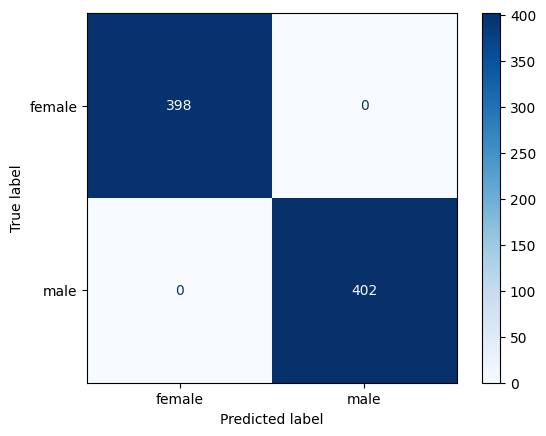

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn import svm
import timeit
start = timeit.default_timer()

# Testing the model using the training data
y_pred = model.predict(x_train)
end = timeit.default_timer()
print("Predict time: ", end-start, " s")
  
# Calculating the accuracy of the model
accuracy = accuracy_score(y_pred, y_train)
  
# Print the accuracy of the model
print(f"The model is {accuracy*100}% accurate")

# Confusion matrix
cm = confusion_matrix(y_train, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['female', 'male'])
cm_display.plot(cmap="Blues")

Nhận xét:

Độ chính xác: 1.0

The model is 94.0% accurate


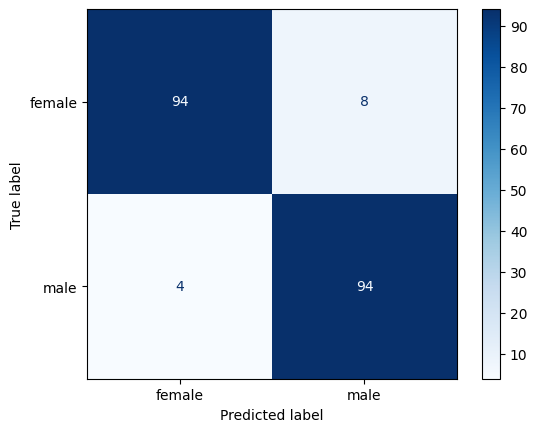

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Testing the model using the testing data
y_pred = model.predict(x_test)
  
# Calculating the accuracy of the model
accuracy = accuracy_score(y_pred, y_test)
  
# Print the accuracy of the model
print(f"The model is {accuracy*100}% accurate")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['female', 'male'])
cm_display.plot(cmap="Blues")

Các trường hợp dự đoán sai trên tập kiểm thử:
- Có 4 trường hợp dự đoán "Nữ" với ảnh gốc là "Nam"
- Có 8 trường hợp dự đoán "Nam" với ảnh gốc là "Nữ"

Nhận xét:
- Độ chính xác: 0.94

### Visulize result from Test Dataset's predictions

[124 102  36  41  79 128 172 187 146 101 141 185  89  92  57  59]


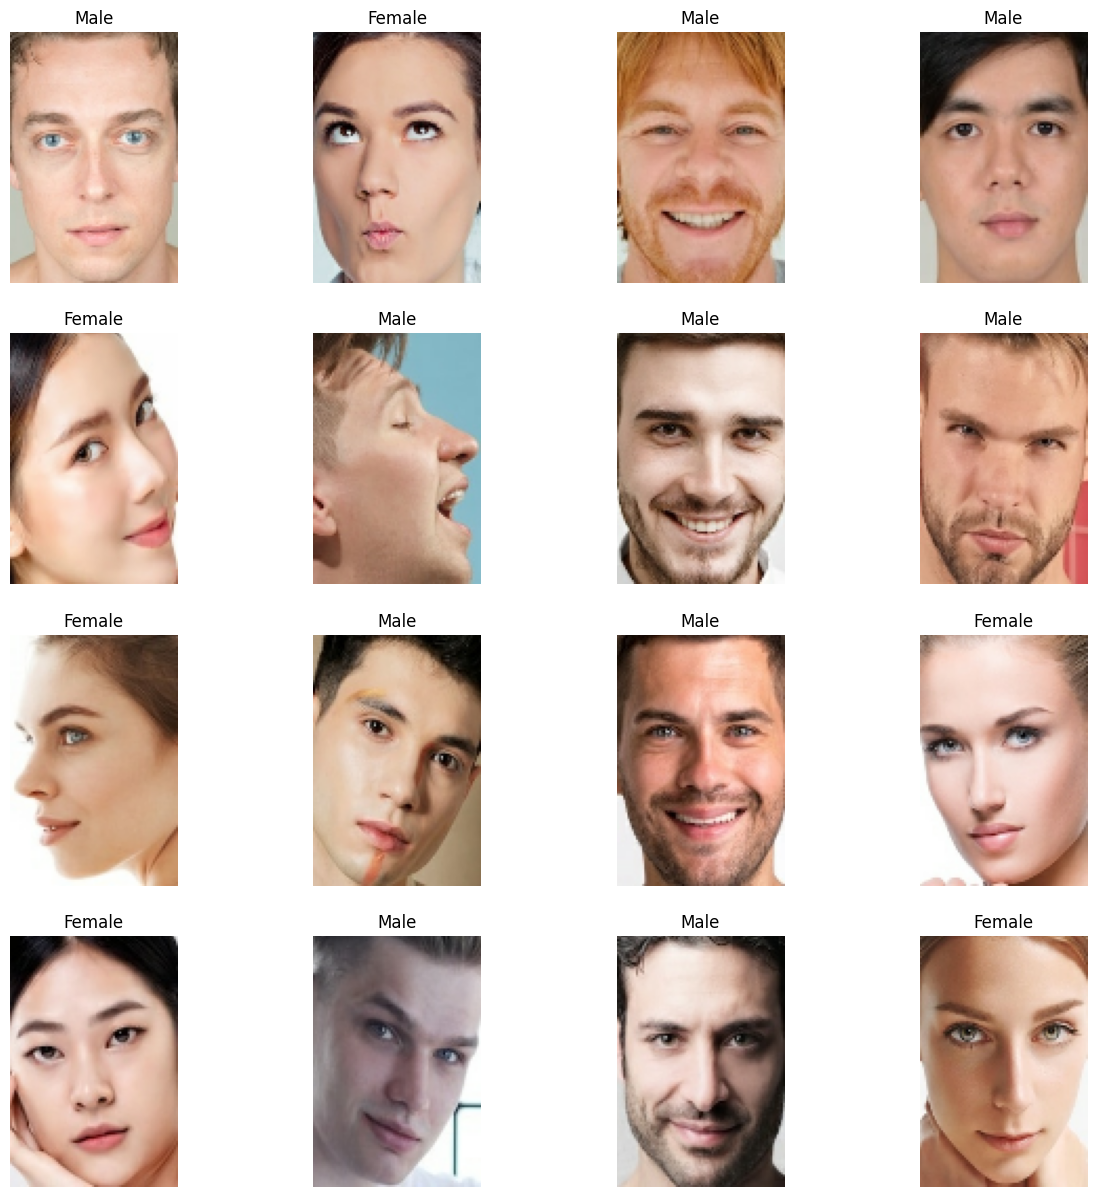

In [ ]:
plt.figure(figsize=(15, 15))
j = 1
indices = np.random.choice(x_test.shape[0], size=16, replace=False)
print(indices)
for i in indices:
    x = x_test[i]
    x = np.expand_dims(x, axis=0)
    result = model.predict(x)
    ax = plt.subplot(4, 4, j)
    j+=1
    plt.imshow(imgs[i])
    plt.title(f"Male" if result[0] else f"Female")
    plt.axis("off")

### Visulize Test Dataset's Fail Cases

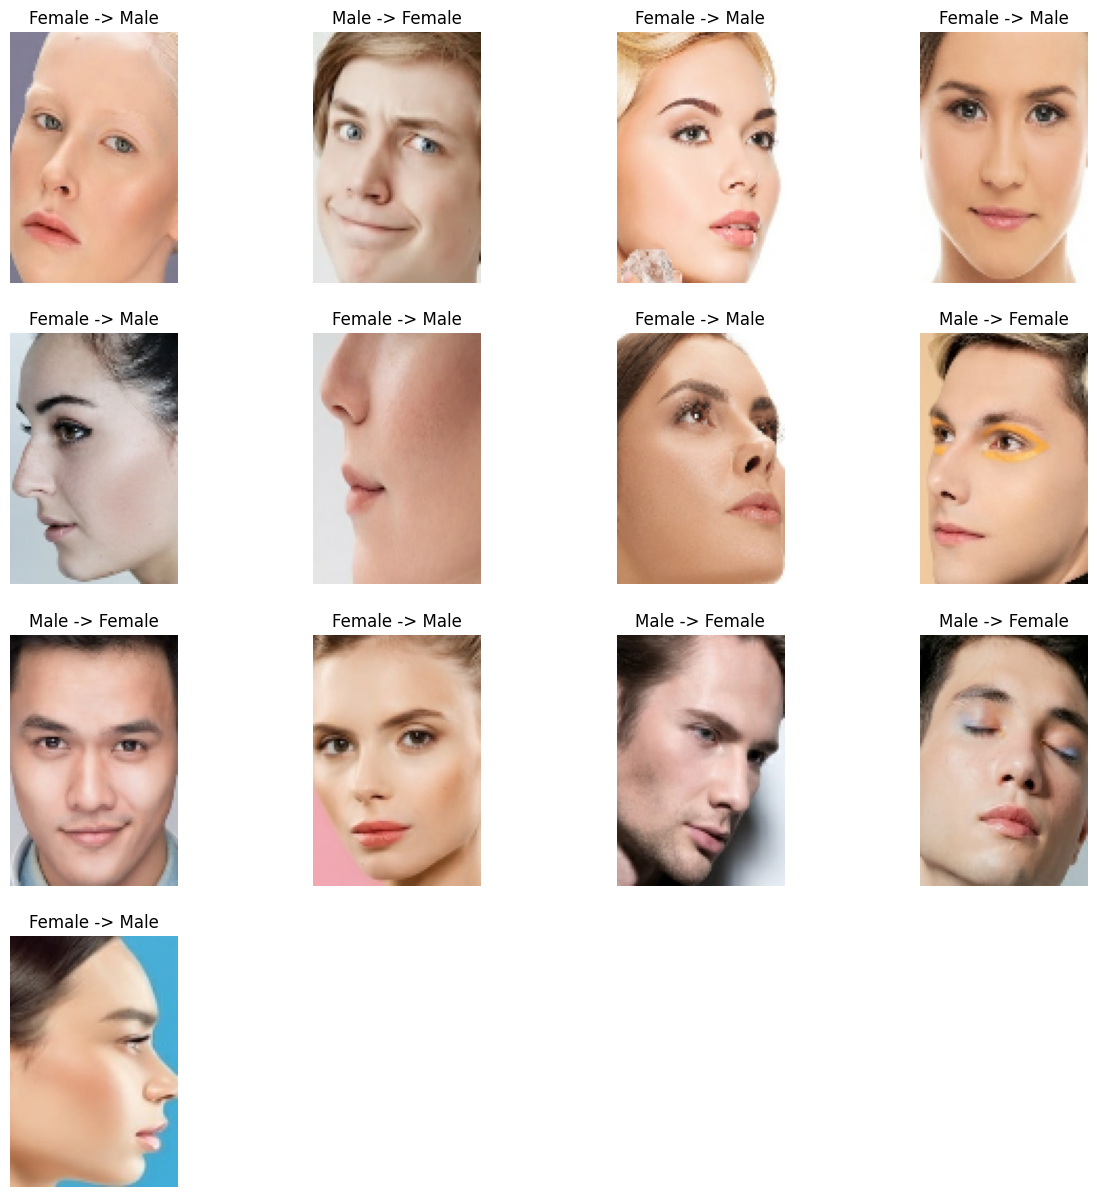

In [ ]:
plt.figure(figsize=(15, 15))
j = 1
for i in range(x_test.shape[0]):
    image = x_test[i]
    image = np.expand_dims(image, axis=0)
    label = y_test[i]
    result = model.predict(image)
    if result[0] != label:
        ax = plt.subplot(4, 4, j)
        j += 1
        plt.imshow(imgs[i])
        plt.title("Male -> Female" if label else "Female -> Male")
        plt.axis("off")

### For compare processing time

In [ ]:
x_test = []
y_test = []
for images, labels in tqdm(test_dataset):
    x_test.append(images.numpy().astype("uint8"))
    y_test.append(labels.numpy().astype("uint8"))
x_test = np.concatenate(x_test)
y_test = np.concatenate(y_test)
print('\n', x_test.shape, y_test.shape)

100%|██████████| 2/2 [00:10<00:00,  5.12s/it]


 (100, 120, 80, 3) (100,)


In [ ]:
import timeit
start = timeit.default_timer()
hog_features = []
for img in tqdm(x_test):
    hog_features.append(compute_hog(img))
x_test = np.array(hog_features)
end =timeit.default_timer()
print("\nExecution time: ", end-start, " s")
print('\n', x_test.shape)

100%|██████████| 100/100 [00:01<00:00, 50.80it/s]


Execution time:  1.9745757719999801  s

 (100, 4536)


Predict time:  0.06916453799999545  s
The model is 94.0% accurate


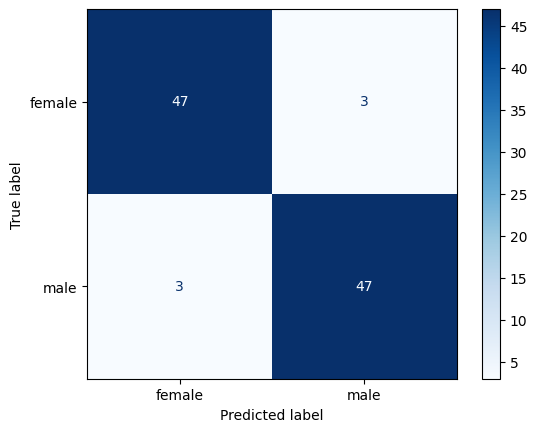

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import timeit
start = timeit.default_timer()

# Testing the model using the testing data
y_pred = model.predict(x_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_pred, y_test)
end = timeit.default_timer()
print("Predict time: ", end-start, " s")
  
# Print the accuracy of the model
print(f"The model is {accuracy*100}% accurate")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['female', 'male'])
cm_display.plot(cmap="Blues")

## Big dataset

### Feature extraction

In [ ]:
def compute_gradient(image):
    # Compute gradient using Sobel kernel
    # dx = cv2.Sobel(image, cv2.CV_32F, 1, 0, ksize=1)
    # dy = cv2.Sobel(image, cv2.CV_32F, 0, 1, ksize=1)
    xkernel = np.array([[-1, 0, 1]])
    ykernel = np.array([[-1], [0], [1]])
    dx = cv2.filter2D(img, cv2.CV_32F, xkernel)
    dy = cv2.filter2D(img, cv2.CV_32F, ykernel)
    
    # Compute magnitude and direction of gradient
    mag = np.sqrt(dx ** 2 + dy ** 2)
    angle = np.arctan(dy/(dx+1e-5))
    return mag, angle

def hog_normalize_block(block, method, eps=1e-5):
    if method == 'L1':
        out = block / (np.sum(np.abs(block)) + eps)
    elif method == 'L1-sqrt':
        out = np.sqrt(block / (np.sum(np.abs(block)) + eps))
    elif method == 'L2':
        out = block / np.sqrt(np.sum(block ** 2) + eps ** 2)
    elif method == 'L2-Hys':
        out = block / np.sqrt(np.sum(block ** 2) + eps ** 2)
        out = np.minimum(out, 0.2)
        out = out / np.sqrt(np.sum(out ** 2) + eps ** 2)
    else:
        raise ValueError('Selected block normalization method is invalid.')

    return out

In [ ]:
def compute_hog(image, pixels_per_cell=(8, 8), block_size=(2, 2), orientations=9, block_norm='L2-Hys'):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = np.float32(image) / 255.0
    # Compute gradient and direction
    magnitude, angle = compute_gradient(image)
    angle = np.degrees(angle) # -90 -> 9
    angle += 90 # 0 -> 180
    # print(np.min(angle), np.max(angle))

    # Compute the number of cells in each dimension
    n_cells_x = int(image.shape[1] // pixels_per_cell[1])
    n_cells_y = int(image.shape[0] // pixels_per_cell[0])
    
    # Compute histogram for each cell
    histograms = np.zeros((n_cells_y, n_cells_x, orientations), dtype=np.float32)
    for i in range(n_cells_y):
        for j in range(n_cells_x):
            cell_mag = magnitude[i * pixels_per_cell[0]:(i + 1) * pixels_per_cell[0],
                            j * pixels_per_cell[1]:(j + 1) * pixels_per_cell[1]]
            cell_orientation = angle[i * pixels_per_cell[0]:(i + 1) * pixels_per_cell[0],
                                j * pixels_per_cell[1]:(j + 1) * pixels_per_cell[1]]
            # https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html
            histograms[i, j], _  = np.histogram(cell_orientation, bins=orientations, range=(0, 180), weights=cell_mag) # 1-D vector, 9 elements
    # print('(num_cell_y, num_cell_x, orientations)')
    # print(histograms.shape)

    # Compute the number of blocks in each dimension
    n_blocks_x = n_cells_x - block_size[1] + 1
    n_blocks_y = n_cells_y - block_size[0] + 1
    
    # Compute normalized block descriptor for each block
    hog_features = np.zeros((n_blocks_y, n_blocks_x, block_size[0] * block_size[1] * orientations), dtype=np.float32)
    for i in range(n_blocks_y):
        for j in range(n_blocks_x):
            block_hist = histograms[i:i + block_size[0], j:j + block_size[1], :].flatten()
            block_hist = hog_normalize_block(block_hist, block_norm)
            hog_features[i, j] = block_hist
    # print('(num_block_y, num_block_x, block_size[0] * block_size[1] * orientations)')
    # print(hog_features.shape)

    # Flatten the feature array to obtain the final HOG feature vector
    hog_features = hog_features.flatten()
    
    return hog_features

In [ ]:
x_train = []
y_train = []
for images, labels in tqdm(train_dataset):
    x_train.append(images.numpy().astype("uint8"))
    y_train.append(labels.numpy().astype("uint8"))
    
x_train = np.concatenate(x_train)
y_train = np.concatenate(y_train)
print('\n', x_train.shape, y_train.shape)

100%|██████████| 131/131 [00:03<00:00, 35.19it/s]



 (8364, 120, 80, 3) (8364,)


In [ ]:
imgs = []
y_test = []
for images, labels in tqdm(test_dataset):
    imgs.append(images.numpy().astype("uint8"))
    y_test.append(labels.numpy().astype("uint8"))
for images, labels in tqdm(validation_dataset):
    imgs.append(images.numpy().astype("uint8"))
    y_test.append(labels.numpy().astype("uint8"))

imgs = np.concatenate(imgs)
y_test = np.concatenate(y_test)
print('\n', imgs.shape, y_test.shape)

100%|██████████| 17/17 [00:00<00:00, 26.86it/s]


 (2092, 120, 80, 3) (2092,)


In [ ]:
hog_features = []
for img in tqdm(x_train):
    hog_features.append(compute_hog(img))
x_train = np.array(hog_features)
print('\n', x_train.shape)

100%|██████████| 8364/8364 [03:25<00:00, 40.73it/s]


 (8364, 4536)


In [ ]:
hog_features = []
for img in tqdm(imgs):
    hog_features.append(compute_hog(img))
x_test = np.array(hog_features)
print('\n', x_test.shape)

100%|██████████| 2092/2092 [00:52<00:00, 39.56it/s]


 (2092, 4536)


### Train and test

In [ ]:
from sklearn import svm

model = svm.SVC(kernel='linear', C=0.1, gamma=0.001)
# Training the model using the training data
model.fit(x_train, y_train)

SVC(C=0.1, gamma=0.001, kernel='linear')

The model is 100.0% accurate


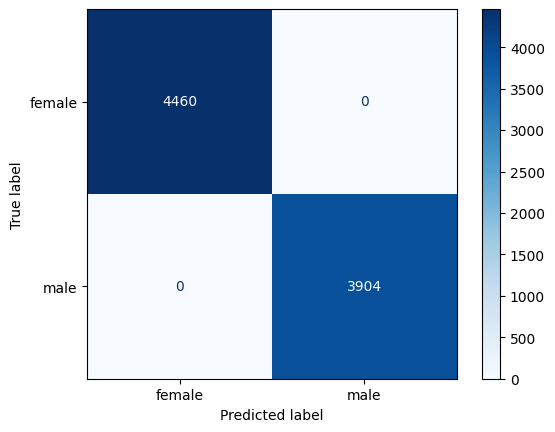

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Testing the model using the training data
y_pred = model.predict(x_train)
  
# Calculating the accuracy of the model
accuracy = accuracy_score(y_pred, y_train)
  
# Print the accuracy of the model
print(f"The model is {accuracy*100}% accurate")

# Confusion matrix
cm = confusion_matrix(y_train, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['female', 'male'])
cm_display.plot(cmap="Blues")

Nhận xét:

Độ chính xác: 1.0

The model is 95.79349904397706% accurate


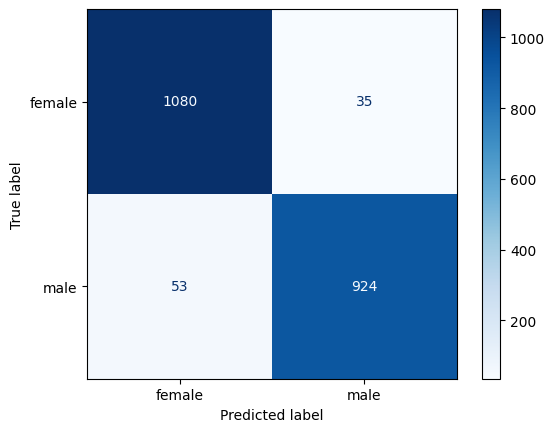

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Testing the model using the testing data
y_pred = model.predict(x_test)
  
# Calculating the accuracy of the model
accuracy = accuracy_score(y_pred, y_test)
  
# Print the accuracy of the model
print(f"The model is {accuracy*100}% accurate")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['female', 'male'])
cm_display.plot(cmap="Blues")

Các trường hợp dự đoán sai trên tập kiểm thử:
- Có 53 trường hợp dự đoán "Nữ" với ảnh gốc là "Nam"
- Có 35 trường hợp dự đoán "Nam" với ảnh gốc là "Nữ"

Nhận xét:
- Độ chính xác: 0.958

### Visulize result from Test Dataset's predictions

[1767  193 1018 1916  679 1627  690 1520 1593 1285 1050  520  666  147
   30  702]


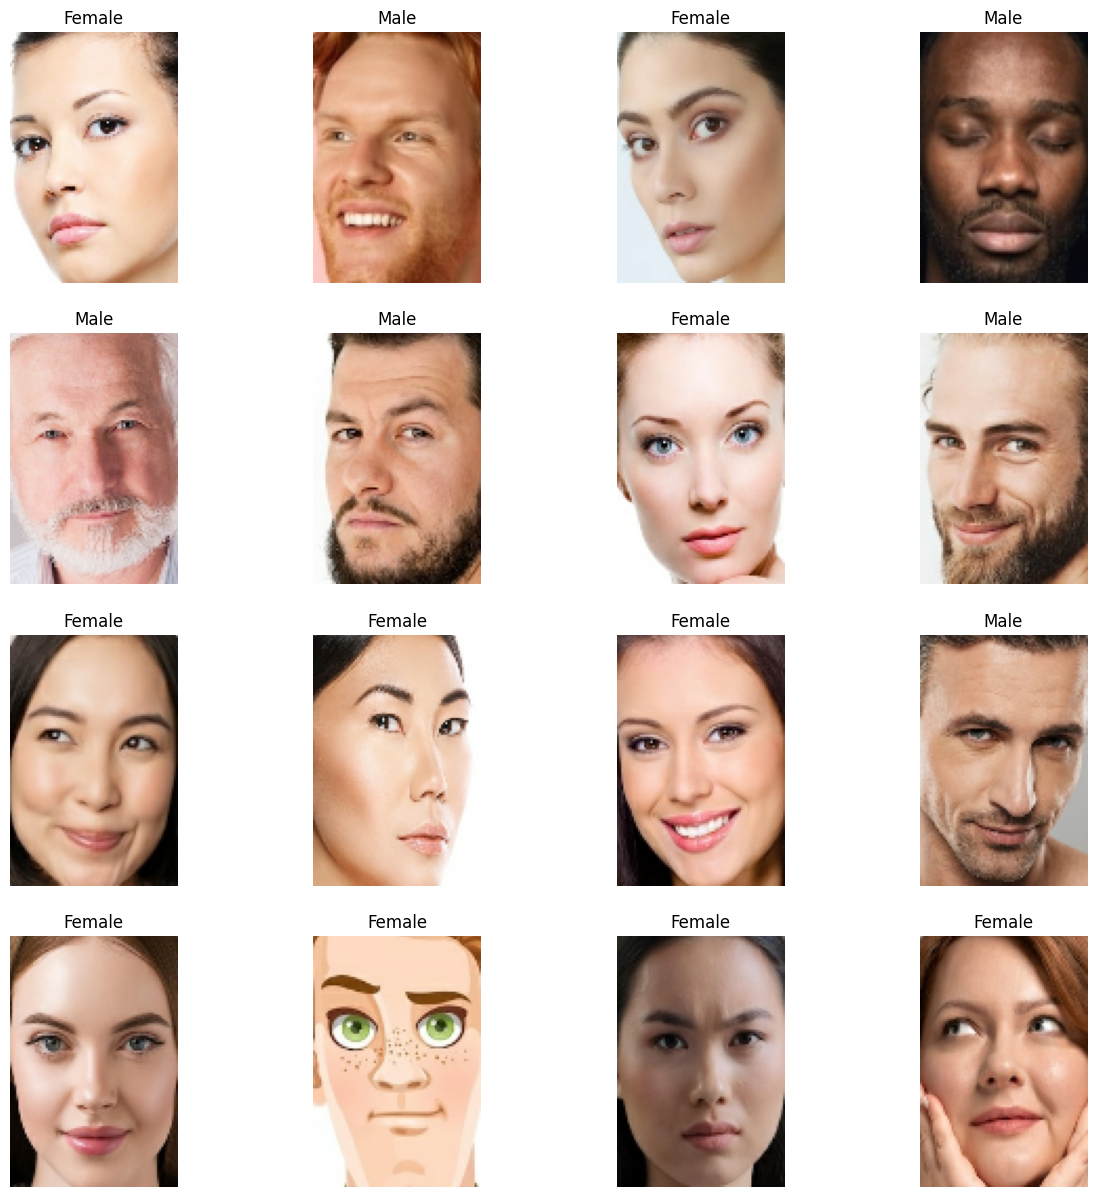

In [ ]:
plt.figure(figsize=(15, 15))
j = 1
indices = np.random.choice(x_test.shape[0], size=16, replace=False)
print(indices)
for i in indices:
    x = x_test[i]
    x = np.expand_dims(x, axis=0)
    result = model.predict(x)
    ax = plt.subplot(4, 4, j)
    j+=1
    plt.imshow(imgs[i])
    plt.title(f"Male" if result[0] else f"Female")
    plt.axis("off")

### Visulize Test Dataset's Fail Cases

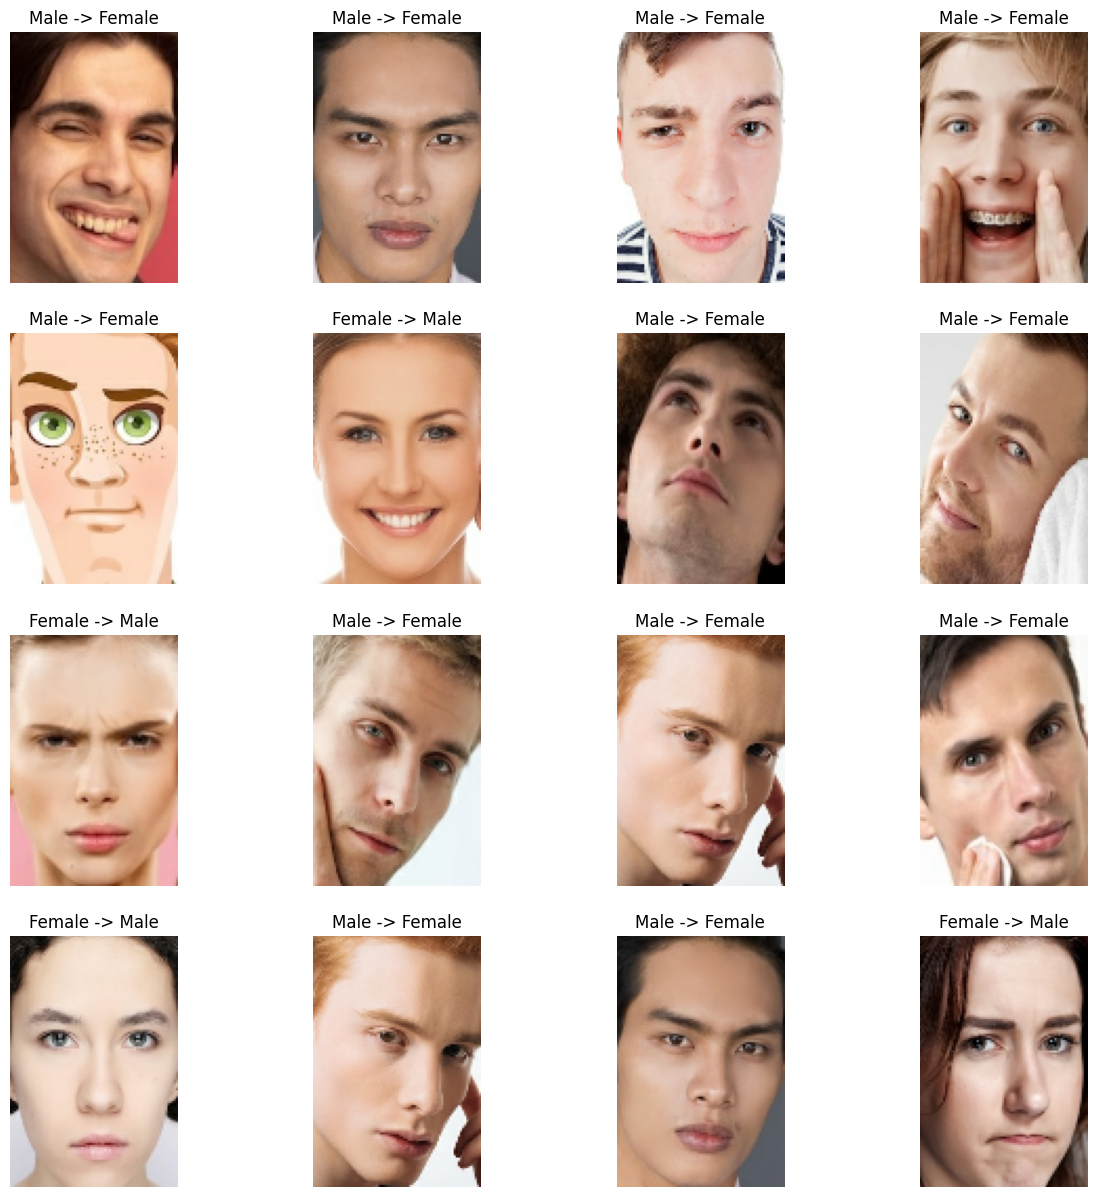

In [ ]:
plt.figure(figsize=(15, 15))
j = 1
for i in range(x_test.shape[0]):
    image = x_test[i]
    image = np.expand_dims(image, axis=0)
    label = y_test[i]
    result = model.predict(image)
    if result[0] != label and j <= 16:
        ax = plt.subplot(4, 4, j)
        j += 1
        plt.imshow(imgs[i])
        plt.title("Male -> Female" if label else "Female -> Male")
        plt.axis("off")

## Nhận xét:
Mô hình đạt được kết quả tốt trên cả tập huấn luyện và kiểm thử.
### Small dataset
Mô hình đạt độ chính xác 100% trên tập train; 94 % trên tập test
### Big dataset
Mô hình đạt độ chính xác 100% trên tập train; 95.8 % trên tập test